## Part 1: Building up a basic predictive model

### Data Visualization

In [75]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_copy.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,1,8,1,22,7,0.461538,MC,Orthopedics-Reconstructive,58,...,0,0,1,0,No,1,No,1,1,False
1,Caucasian,1,7,2,1,1,0.153846,MC,Nephrology,59,...,0,0,0,0,No,1,No,0,1,False
2,Caucasian,1,10,1,1,7,0.230769,MC,Emergency/Trauma,56,...,0,0,0,0,No,0,No,0,1,False
3,Caucasian,1,8,1,2,7,0.692308,MC,InternalMedicine,68,...,0,0,0,0,No,1,No,1,1,False
4,Caucasian,1,8,1,3,5,0.846154,UN,InternalMedicine,77,...,0,0,0,0,No,1,No,0,1,False


#### Plot the distribution of unique classes of the target variable, i.e., readmitted.  

In [76]:
import plotly.express as px

# Create a DataFrame with counts of each unique class of 'readmitted'
readmitted_counts = df['readmitted'].value_counts().reset_index()
readmitted_counts.columns = ['Readmission Status', 'Count']

# Create an interactive bar chart using Plotly
fig = px.bar(readmitted_counts, x='Readmission Status', y='Count', color='Readmission Status',
             title='Distribution of Unique Classes of "readmitted"',
             labels={'Count': 'Count'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.show()


#### Plot the count of number of readmitted cases against age.

In [77]:
# Group the data by age and readmitted status and count the occurrences
grouped_df = df.groupby(['age', 'readmitted']).size().reset_index(name='count')

# Create an interactive bar plot using Plotly Express
fig = px.bar(grouped_df, x='age', y='count', color='readmitted',
             title='Count of Readmitted Cases against Age',
             labels={'count': 'Count', 'age': 'Age'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### Plot a graph that displays the count of target variable against the number of medications. 

In [78]:
# Group the data by 'num_medications' and 'readmitted', and count occurrences
grouped_df = df.groupby(['num_medications', 'readmitted']).size().reset_index(name='count')

# Create an interactive bar plot using Plotly Express
fig = px.bar(grouped_df, x='num_medications', y='count', color='readmitted',
             title='Count of Readmitted Cases against Number of Medications',
             labels={'count': 'Count', 'num_medications': 'Number of Medications'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Number of Medications', yaxis_title='Count')
fig.show()

#### Show the scatter matrix plot and the correlation matrix. This should be a very large matrix and you might find it difficult to analyse. Which pair of features are highly correlated?

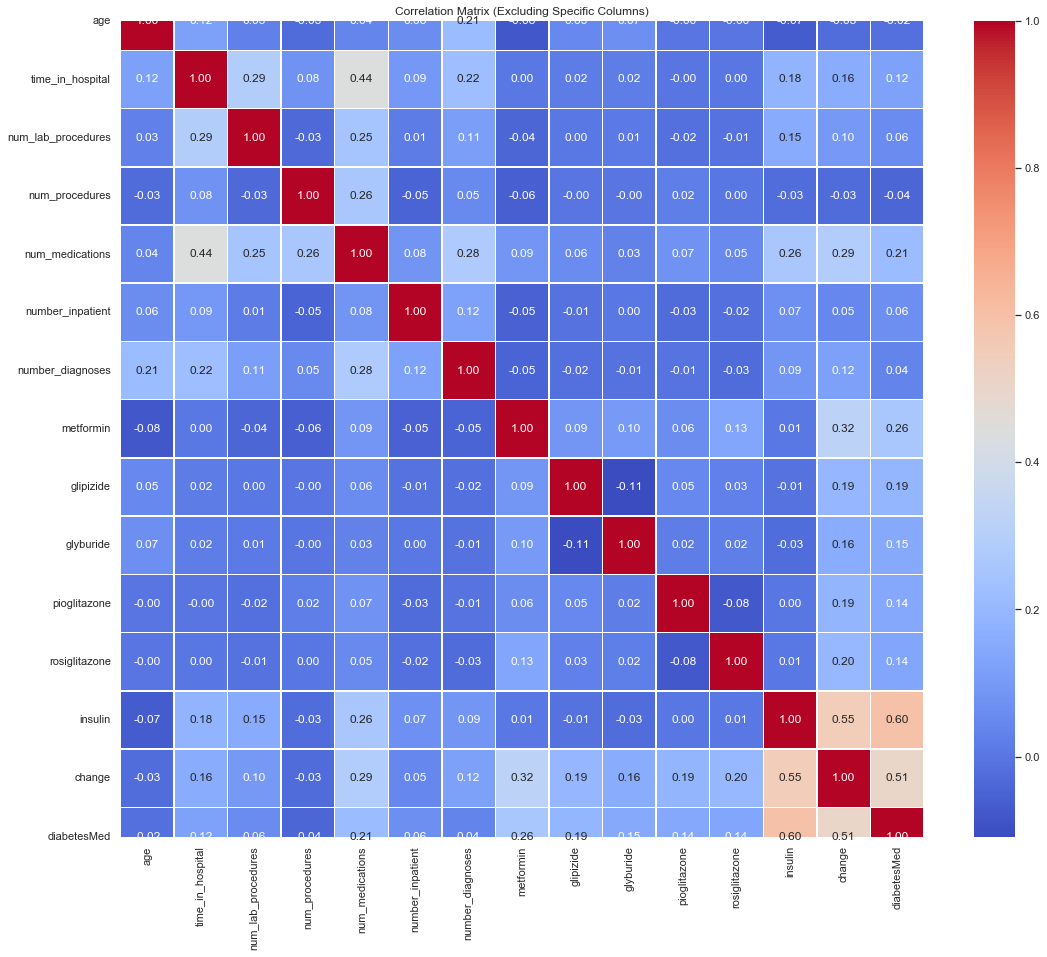

In [79]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlation matrix excluding specific columns
columns_to_exclude = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id','gender','number_outpatient','number_emergency']
correlation_matrix = numeric_df.drop(columns_to_exclude, axis=1).corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Excluding Specific Columns)')
plt.show()



#### Additional Plots

#### 1) Distribution of Age

In [80]:
fig = px.histogram(df, x='age', title='Distribution of Age', nbins=20)
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### 2) Number of Medications by Age

In [81]:
fig = px.box(df, x='age', y='num_medications', title='Number of Medications by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Medications')
fig.show()

#### 3) Readmission Status by Age and Gender

In [82]:
fig = px.histogram(df, x='age', color='readmitted', facet_col='gender', barmode='group', title='Readmission Status by Age and Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', legend_title='Readmission Status')
fig.show()

#### 3) Time in Hospital Distribution

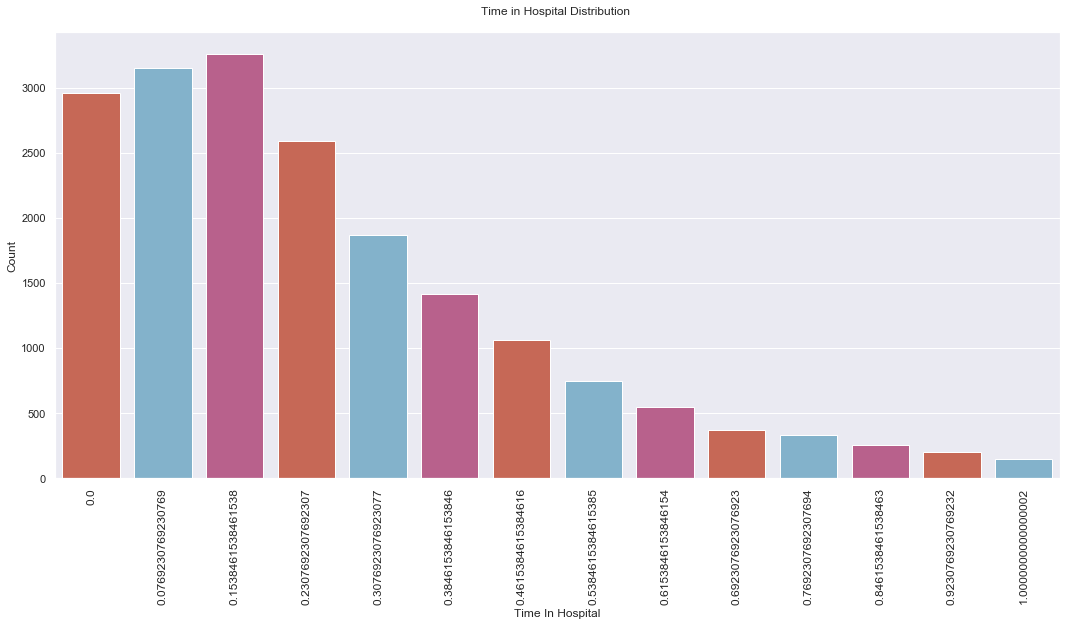

0.2509992917443184

In [83]:
my_colors = ['#D95B43', '#77B5D7', '#C6538C']  # Example color codes
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  data=df, palette=my_colors) 
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()
df['time_in_hospital'].mean()

From the Graph and Mean of the Time in Hospital, We found that the majority of the people stays in hospital 2-3 Days.

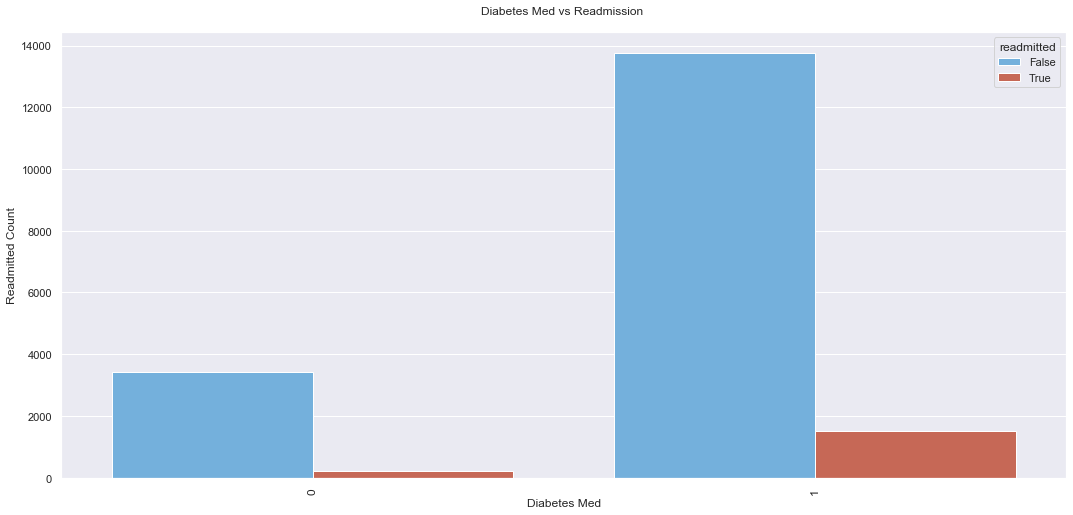

In [84]:
my_colors = ['#63B3ED', '#D95B43'] 
ax = sns.countplot(x='diabetesMed', hue= 'readmitted', data= df, palette=my_colors) 
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

From above figure we can see that, the Patient with Diabetes have the high amount of readmissions.